# Framing Prediction Problem

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import plotly.express as px
pd.options.plotting.backend = 'plotly'
import matplotlib.pyplot as plt

from utils.eda import *
from utils.dsc80_utils import *
from utils.graph import *

from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, Binarizer, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC, NuSVC
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.base import BaseEstimator, TransformerMixin

from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_fscore_support
from sklearn import metrics
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score


***
# Problem Identification
***

**Analysis**:
Identify a prediction problem. Feel free to use one of the example prediction problems stated in the “Example Questions and Prediction Problems” section of your dataset’s description page or pose a hypothesis test of your own. The prediction problem you come up with doesn’t have to be related to the question you were answering in Steps 1-4, but ideally, your entire project has some sort of coherent theme.

**Report**:
Clearly state your prediction problem and type (classification or regression). If you are building a classifier, make sure to state whether you are performing binary classification or multiclass classification. Report the response variable (i.e. the variable you are predicting) and why you chose it, the metric you are using to evaluate your model and why you chose it over other suitable metrics (e.g. accuracy vs. F1-score).

Note: Make sure to justify what information you would know at the “time of prediction” and to only train your model using those features. For instance, if we wanted to predict your final exam grade, we couldn’t use your Project 4 grade, because Project 4 is only due after the final exam! Feel free to ask questions if you’re not sure.

### Some Potential Ideas:
1. Sentiment Analysis with `review` column
2. Using   `recipe` column and feature engineering (length of `recipe`, TF-IDF, ...) to predict `ratings`
3. Using text data as a input to predict the rating of the user and identify preference of users (pre-step to reconmender system)

***
# Framing a Question (Some Ideas)
***

We know that Recipe's mean TFIDF distribution is different for higher rating recipe than lower rating recipe:
- We need `X` and a `y` -> find relationships! -> Supervised ML model
- We currently have the DataFrame grouped by recipe
- We want to predict `rating` as a classfication problem
    - `rating` in recipe df: a quality of recipe
    - `rating` in user_id df: user preference ✅
- Features for user_id df:
    - `TF-IDF mean/max/sum/partial_mean` of `description` for **recipe per user_id** (may have more than one recipe) that have **high ratings**
        - This evaluates whether a word shows more often in this **user's high rated recipe decription** compare to all **recipe decription**, thus, meaning that it is more important to this user.
    - `n_ingredients`
    - `n_steps`
    - `minutes`
    - `calories`
    - `sodium`
    - `previous_rating` (need to explore)
    - `word2vec` (need to explore, somr info [here](https://towardsdatascience.com/word2vec-explained-49c52b4ccb71)) 
        - Each `user_id` have a pool of words in a **vector space** (from description, can have more)
        - We want to see how similar (cosine distance) between recipe tags `word2vec` and the pool
        - [good theory background](https://medium.com/@zafaralibagh6/a-simple-word2vec-tutorial-61e64e38a6a1)

- consider using `tags`, `review`, `steps`?

- Further: using preference to recomand recipe!

- `Voting`?

- [Gaussian Bayesian Network](https://scikit-learn.org/stable/modules/naive_bayes.html)?

***
# Baseline Model
***

### Baseline Model
**Analysis**:
Train a “baseline model” for your prediction task that uses at least two features. (For this requirement, two features means selecting at least two columns from your original dataset that you should transform). You can leave numerical features as-is, but you’ll need to take care of categorical columns using an appropriate encoding. Implement all steps (feature transforms and model training) in a single sklearn Pipeline.

Note: Both now and in Step 7: Final Model, make sure to evaluate your model’s ability to generalize to unseen data!

There is no “required” performance metric that your baseline model needs to achieve.

**Report**:
Describe your model and state the features in your model, including how many are quantitative, ordinal, and nominal, and how you performed any necessary encodings. Report the performance of your model and whether or not you believe your current model is “good” and why.

Tip: Make sure to hit all of the points above: many projects in the past have lost points for not doing so.

## Predictive Question
We want to predict `rating` as a classfication problem, prdicting `rating` (5 catagories) in the user_id DataFrame to demonstarte understanding of user preference.
- **Using the original big DataFrame for predicting rating**

## Feature Engineering
Remanber to take care of the missing data

- `n_ingredients`
- `n_steps`
- `minutes`
- `calories`
- `sodium`

- `tfidf_mean` of `description` for **recipe per user_id** (may have more than one recipe)
    - `TFIDF` of a word evaluates whether a word shows more often in this **user's recipe decription** compare to all **recipe decription**, thus, meaning that it is more important to this user.
    - `TFIDF mean` for an `description` for the `recipe` represents the importantness of an sentence in the whole data set of text
- `word2vec` Similarity
    - All good `recipe` (above 3 rating) can be a pool of words in a **vector space** (from description, can have more)
    - We want to see how similar (cosine distance) between each recipe `word2vec` description's vector to the good pool of vectors

- Might need to 回归数据去找更多的特征

## Ensemble Learning (Bagging, Stacking, Boosting)
Heterogenous Ensemble Voting:
1. Homogenous Ensemble `Rabndom Forest`
2. Model2...
3. Model3...

***
# Pipeline Creation
***

You can do all the function transfromation in here actually 

## Problem of Unbalanced Data
**The hard problem is not to predict the rating 5 but rather predict ratings not 5**
Problem identified with previous baseline version:
1. The baseline model is just predicting the 5 rating, accuracy doesn't entell all, need to check the actual confusion matrix
2. Also from count in the evaluation matrix above we know that the rest of the rating is under represented! Use class weight hyperparameter in the random forest model to accounts for this problem in the data set.
    - stratified turn on to preserve original data proportion
3. Maybe the data is too sparse, logistic regression?
4. Maybe need to RandomSearch the weighting parameter?
5. Some more feature engineering?
6. Maybe make it into binary? Or just make logistic regression binary classifier
7. Write baseline with np.random.choice
8. Write a naive bayes for previous catagorical to get probability -> takes in all catagorical
    - customized transformer class -> fit naive bayes
    - need to be pre-trained for fit
    - transform directly feed in data
    
9. filter out count < less shown feature for pca
10. Stacking can't use homogenous model

In [210]:
interactions = pd.read_csv('food_data/RAW_interactions.csv')
recipes = pd.read_csv('food_data/RAW_recipes.csv')
step0 = recipes.merge(interactions, how='left', left_on='id', right_on='recipe_id', indicator=True)
base_df = (step0
           .pipe(initial)
           .pipe(transform_df)
           .pipe(outlier)
           )[['n_ingredients','minutes','n_steps','description','sugar','calories','sodium','total_fat','rating','tags','name','recipe_date']]

In [211]:
base_df = base_df.assign(is_good = base_df['rating']==5)
base_df

,n_ingredients,minutes,n_steps,description,...,tags,name,recipe_date,is_good
0,9,40,10,"these are the most; chocolatey, moist, rich, d...",...,"[60-minutes-or-less, time-to-make, course, mai...",1 brownies in the world best ever,2008-10-27,False
1,11,45,12,this is the recipe that we use at my school ca...,...,"[60-minutes-or-less, time-to-make, cuisine, pr...",1 in canada chocolate chip cookies,2011-04-11,True
2,9,40,6,since there are already 411 recipes for brocco...,...,"[60-minutes-or-less, time-to-make, course, mai...",412 broccoli casserole,2008-05-30,True
...,...,...,...,...,...,...,...,...,...
234426,7,20,5,"i've heard of the 'cookies by design' company,...",...,"[30-minutes-or-less, time-to-make, course, pre...",cookies by design sugar shortbread cookies,2008-04-15,False
234427,7,20,5,"i've heard of the 'cookies by design' company,...",...,"[30-minutes-or-less, time-to-make, course, pre...",cookies by design sugar shortbread cookies,2008-04-15,True
234428,7,20,5,"i've heard of the 'cookies by design' company,...",...,"[30-minutes-or-less, time-to-make, course, pre...",cookies by design sugar shortbread cookies,2008-04-15,False


## Handling Missing Data
It have been shwon earlier that the missingness of the `rating` columns seems to be **NMAR**, so it is not dependent on the column but rather depending on itself. Thus, we will be imputing the ratings through **random imputation**.
- Consider this a bit more

In [212]:
def prob_impute(s):
    s = s.copy()
    num_null = s.isna().sum()
    fill_values = np.random.choice(s.dropna(), num_null)
    s[s.isna()] = fill_values
    return s

base_df['rating'] = prob_impute(base_df['rating'])
base_df = base_df.dropna()

In [213]:
base_df = base_df.assign(is_low = base_df['rating']<=3)

In [214]:
base_df.isna().sum().sum()

0

## Train/Validate/Test Split
- Test: 0.25
- Train_big: 0.75
- Train: 0.75 * 0.75 = 0.5625
- Val: 0.75 * 0.25 = 0.1875

In [215]:
base_df['rating'].value_counts() / base_df.shape[0]

5.0    0.77
4.0    0.18
3.0    0.03
1.0    0.01
2.0    0.01
Name: rating, dtype: float64

In [216]:
base_df['rating'].value_counts()

5.0    118731
4.0     27118
3.0      5201
1.0      1886
2.0      1745
Name: rating, dtype: int64

In [317]:
X = base_df.drop('rating', axis=1)
y = base_df['rating']
X_big_train, X_test, y_big_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_big_train, y_big_train, test_size=0.25, random_state=1, stratify=y_big_train)

In [218]:
y_train.isna().sum() + X_train.isna().sum().sum()

0

In [219]:
(y_big_train.shape[0] / y_big_train.value_counts())

5.0     1.30
4.0     5.70
3.0    29.74
1.0    82.04
2.0    88.62
Name: rating, dtype: float64

## Transformation Functions

In [346]:
def detect_key_low(df):
    '''transforming description's tfidf to actual most important word in a description then compare if it is in the low rated set'''

    def key_largest(row):
        return row.index[row.argmax()]

    def make_tfidf(series):
        lst = series.explode().astype(str).values # this may be slow
        count = TfidfVectorizer()
        count.fit(lst)
        return pd.DataFrame(count.transform(lst).toarray(), columns=count.get_feature_names_out())
    
    tfidf_low = make_tfidf(df[df['is_low']==True][df.columns[1]])
    tfidf_base = make_tfidf(df[df.columns[1]])

    keyword_all = tfidf_base.apply(key_largest, axis=1) #argmax a bit faster
    keyword_low = tfidf_low.apply(key_largest, axis=1)
    pool_low = keyword_low.unique()

    in_low = keyword_all.apply(lambda x: True if x in pool_low else False)

    return pd.DataFrame(in_low)


def tag_counts(df):
    '''number of tags counted'''
    return pd.DataFrame(df['tags'].apply(lambda x: len(x)).rename('counts'))


def tag_ohe_pca(df):
    '''OHE all the tag result after it have being pca dimension reduced to 50'''
    # getting all the unique one quick
    set = [j for i in df['tags'].tolist() for j in i] # explode in a time complexity efficient way
    count = CountVectorizer()
    count.fit(set).transform(set)

    my_dict = np.array(list(count.vocabulary_.keys()))

    def helper_function(list,dict):
        return np.array([i in list for i in dict])

    # helper_function(X_train["tags"].iloc[0],my_dict)
    
    a = df["tags"].apply(lambda x:helper_function(x, my_dict))
    
    # change array of array into 2D array
    df_pca = pd.DataFrame(data = np.stack(a.to_numpy()),columns=my_dict)

    flipped = df_pca.T
    filter_df = flipped[flipped.sum(axis=1)>1000].T # keep only useful

    # conduct PCA to reduce to just 50 dimensions
    pca = PCA(n_components=20)
    reduced = pca.fit_transform(filter_df)

    return reduced

Test `make_tfidf`

In [347]:
# make_tfidf_max(X_train[['description']]).isna().sum() # no nan here

In [348]:
# FunctionTransformer(make_tfidf_max).fit_transform(X_train[['description']]).isna().sum() # no nan here

Test `count_tags`

In [329]:
# tag_counts(X_train[['tags']])

Test `tag_ohe_pca`

In [330]:
# X_train["tags"].apply(lambda x: x==np.array(list(count.vocabulary_.keys())))

In [332]:
# tag_ohe_pca(X_train[['tags']])

In [ ]:
# len(pca_result)
# len(y)

Test `key_ohe`/`detect_key_low`

In [ ]:
# is_low = detect_key_low(X_train[['is_low','description']])

In [201]:
# is_low.isna().sum()

## Customized Transformer Classes

In [202]:
class StdScalerByGroup(BaseEstimator, TransformerMixin):
    '''takes in two separate, fitting data may not be transforming data (training)'''

    def __init__(self):
        pass

    def fit(self, X, y=None):
        '''fit using one type of data'''

        # X might not be a pandas DataFrame (e.g. a np.array)
        df = pd.DataFrame(X)

        # Compute and store the means/standard-deviations for each column (e.g. 'c1' and 'c2'), for each group (e.g. 'A', 'B', 'C').
        mean_group = df.groupby(df.columns[0]).mean()
        std_group = df.groupby(df.columns[0]).std()

        for col in mean_group:
            mean_group = mean_group.rename(columns={col:f'{col}_mean'})
            std_group = std_group.rename(columns={col:f'{col}_std'})

        self.grps_ = pd.concat([mean_group,std_group],axis=1)
        return self


    def transform(self, X, y=None):
        '''may be different data'''

        try:
            getattr(self, "grps_")
        except AttributeError:
            raise RuntimeError("You must fit the transformer before tranforming the data!")
        
        def standardize(x, col):
            group = x.name
            
            mean = self.grps_.loc[group, f'{col}_mean']
            std = self.grps_.loc[group, f'{col}_std']

            norm = (x - mean) / std
            return norm

        df = pd.DataFrame(X)
        new=pd.DataFrame()

        for col in df.columns[1:]:
            out = df.groupby(df.columns[0])[col].transform(lambda x: standardize(x, col)) # think in vectorized format, need both row and col
            new = pd.concat([new, out], axis=1)

        return new.assign(group=df[df.columns[0]]).set_index('group')

In [203]:
class NaiveBayesEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.model = MultinomialNB()
    
    def make_tfidf_sum(self, df):
        lst = df['name'].explode().astype(str).values
        count = CountVectorizer(max_features=500).fit(lst)
        
        tfidf = pd.DataFrame(count.transform(lst).toarray(),
                             columns=count.get_feature_names_out())

        return tfidf #pd.DataFrame(tfidf.sum(axis=1))

    def fit(self, X, y):
        X_fit = self.make_tfidf_sum(X)
        #print(X_fit)
        
        self.model.fit(X_fit, y)
        return self

    def transform(self, X):
        X_transform = self.make_tfidf_sum(X)
        return self.model.predict_proba(X_transform)

In [204]:
# def make_tfidf_sum(df):
#         from sklearn.feature_extraction.text import TfidfVectorizer

#         lst = df['description'].explode().astype(str).values
#         count = TfidfVectorizer()
#         count.fit(lst)

#         tfidf = pd.DataFrame(count.transform(lst).toarray(),
#                                 columns=count.get_feature_names_out())

#         return df.reset_index().assign(sum = tfidf.max(axis=1)).groupby('index').sum()


# out = make_tfidf_sum(X_train[['description']])
# MultinomialNB().fit(out, y_train)

In [319]:
naive_bayes = NaiveBayesEncoder().fit(X_train[['name']], y_train)

In [320]:
out = naive_bayes.transform(X_train[['name']])

In [321]:
pd.DataFrame(out, columns=[1,2,3,4,5])

,1,2,3,4,5
0,3.27e-03,7.59e-03,0.05,0.16,0.78
1,1.16e-03,8.35e-03,0.02,0.13,0.84
2,8.98e-03,1.15e-02,0.04,0.19,0.75
...,...,...,...,...,...
87004,7.54e-03,1.78e-03,0.04,0.18,0.77
87005,2.17e-03,2.56e-02,0.04,0.21,0.72
87006,1.71e-02,6.50e-03,0.04,0.32,0.61


## Baseline Model

In [ ]:
norm_relative = Pipeline([
    ('bi_nsteps',Binarizer(threshold=25)),
    ('norm_minutes_binary_nsteps', FunctionTransformer(lambda x: StdScalerByGroup().fit(x).transform(x))),
])

preproc_rf = ColumnTransformer(
    transformers=[
        ('bi_nsteps', Binarizer(threshold=25),['n_steps']),
        ('bi_ningredients', Binarizer(threshold=20),['n_ingredients']),
        ('norm_minutes_binary_nsteps',norm_relative,['n_steps','minutes']),
        ('norm_minutes_binary_ningredients',norm_relative,['n_ingredients','minutes']),
        ('tag_counts',FunctionTransformer(tag_counts),['tags']),
    ],
    remainder='drop'
)

pl_base = Pipeline([
    ('preprocessor', preproc_rf),
    ('rfc', RandomForestClassifier(max_depth=2,
                                   n_estimators=140,
                                   criterion='entropy',
                                   min_samples_split=2))
])

In [ ]:
pl_base.fit(X_train, y_train)
pl_base.score(X_val, y_val)

0.7670241009550736

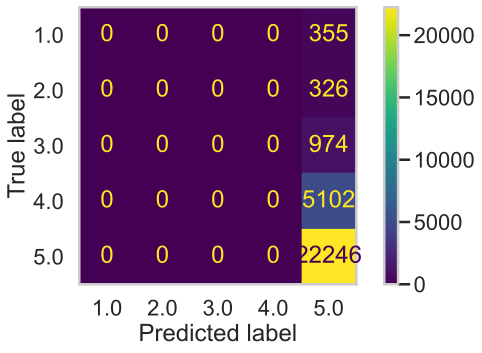

In [ ]:
ConfusionMatrixDisplay.from_estimator(pl_base, X_val, y_val)
plt.grid(False)

## Final Model Comparison With Dummy Model

In [185]:
dummy_clf = DummyClassifier(strategy="uniform")
dummy = dummy_clf.fit(X_train, y_train)

In [349]:
norm_relative = Pipeline([
    ('bi_nsteps',Binarizer(threshold=25)),
    ('norm_minutes_binary_nsteps', FunctionTransformer(lambda x: StdScalerByGroup().fit(x).transform(x))),
])

key_ohe = Pipeline([
    ('tfidf',FunctionTransformer(detect_key_low)),
    ('key_ohe', OneHotEncoder(drop='first'))
])

date_ohe = Pipeline([
    ('date_get', FunctionTransformer(lambda x: pd.DataFrame(x['recipe_date'].dt.year))),
    ('date_ohe', OneHotEncoder())
])

preproc_rf = ColumnTransformer(
    transformers=[
        ('tfidf_key_ohe_description', key_ohe, ['is_low','description']),
        ('tfidf_key_ohe_name', key_ohe, ['is_low','name']),
        ('bi_nsteps', Binarizer(threshold=25),['n_steps']),
        ('bi_ningredients', Binarizer(threshold=20),['n_ingredients']),
        ('norm_minutes_binary_nsteps',norm_relative,['n_steps','minutes']),
        ('norm_minutes_binary_ningredients',norm_relative,['n_ingredients','minutes']),
        ('tag_counts',FunctionTransformer(tag_counts),['tags']), # good for predict 5
        ('robust_nutrition',RobustScaler(),['sugar','sodium','calories','total_fat']),
        ('date_ohe', date_ohe,['recipe_date']), # can't be too sparse, 10 max
        ('tag_pca',FunctionTransformer(tag_ohe_pca),['tags']),
        #('naive_bayes',NaiveBayesEncoder(),['name'])
    ],
    remainder='drop'
)

preproc_lr = ColumnTransformer(
    transformers=[
        ('tag_pca',FunctionTransformer(tag_ohe_pca),['tags']),
    ],
    remainder='drop'
)

class_weight= 'balanced'
#{5.0: 1.60, 4.0: 6.92, 3.0: 31.78, 2.0: 95.44, 1.0: 90.64}
# balanced weighting automatically calculates th  best weighting!

# take in sparse
pl_rf = Pipeline([
    ('preprocessor', preproc_rf),
    ('rfc', RandomForestClassifier(max_depth=2,
                                   n_estimators=140,
                                   criterion='entropy',
                                   min_samples_split=2,
                                   class_weight=class_weight
                                   ))
])

pl_brf = Pipeline([
    ('preprocessor', preproc_rf),
    ('brfc', BalancedRandomForestClassifier(max_depth=2,
                                   n_estimators=140,
                                   min_samples_split=2,
                                   ))
])

# take in not sparse
pl_lr = Pipeline([
    ('preprocessor', preproc_lr),
    ('lr',LogisticRegression(max_iter=1000,
                             multi_class='multinomial',
                             class_weight=class_weight
                             ))
])

pl_svc = Pipeline([
    ('preprocessor', preproc_lr),
    ('svc', LinearSVC(max_iter=1000,
                      multi_class='crammer_singer',
                      class_weight=class_weight
                      ))
])

voter =VotingClassifier(estimators=[('rfc', pl_rf),
                                     #('lr', pl_lr),
                                     ('svc',pl_svc)
                                     ])

In [350]:
# pl_nb.fit(X_train, y_train)
# out_nb = pl_nb.predict_proba(X_train)
# pl_rf.fit(out_nb, y_train)

In [351]:
pl_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('tfidf_key_ohe_description',
                                                  Pipeline(steps=[('tfidf',
                                                                   FunctionTransformer(func=<function detect_key_low at 0x28eeeb1f0>)),
                                                                  ('key_ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['is_low', 'description']),
                                                 ('tfidf_key_ohe_name',
                                                  Pipeline(steps=[('tfidf',
                                                                   FunctionTransformer(func=<function detect_key_low at 0x...
                                                   'calories', 'total_fat']),
                                                 ('date_ohe',
       

## Model Evaluation
- **Precision**: Out of all 5 we predicted, how many are actually 5 (找的所有预测的正样本数据里面有几个真的正样本（TP）)
- **Recall**: Out of all actual 5, how many did we get right (所有真实正样本数据里面我们找到几个正样本（TP），代表这个系统recall到多少正样本是对的)

We care about getting a correct rating for reconmandation, we care about finding **Recall** but still considering precision

[This link](https://towardsdatascience.com/comprehensive-guide-to-multiclass-classification-with-sklearn-127cc500f362) is a good introduction to multi_class classification

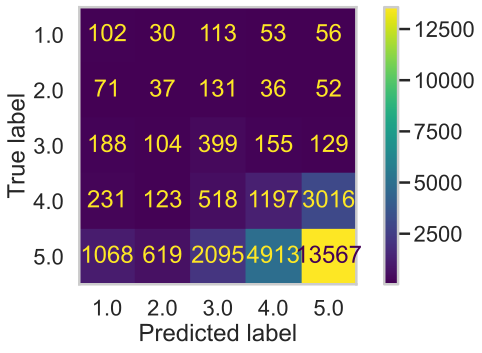

In [352]:
ConfusionMatrixDisplay.from_estimator(pl_rf, X_val, y_val)
plt.grid(False)

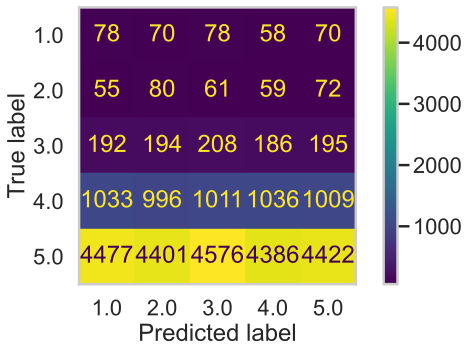

In [353]:
ConfusionMatrixDisplay.from_estimator(dummy, X_val, y_val)
plt.grid(False)

In [354]:
pl_rf.score(X_val, y_val)

0.5287384063717546

In [355]:
dummy.score(X_val, y_val)

0.2036341068165362

In [356]:
pd.DataFrame(precision_recall_fscore_support(pl_rf.predict(X_val), y_val),
             index=['precision','recall','f1_score','count'],
             columns=[1,2,3,4,5]).T

,precision,recall,f1_score,count
1,0.28,0.06,0.10,1647.0
2,0.12,0.04,0.06,936.0
3,0.41,0.12,0.19,3245.0
4,0.24,0.19,0.21,6359.0
5,0.61,0.81,0.69,16816.0


In [357]:
pd.DataFrame(precision_recall_fscore_support(dummy.predict(X_val), y_val),
             index=['precision','recall','f1_score','count'],
             columns=[1,2,3,4,5]).T

,precision,recall,f1_score,count
1,0.21,1.29e-02,0.02,5832.0
2,0.17,9.65e-03,0.02,5701.0
3,0.20,3.42e-02,0.06,5795.0
4,0.20,1.72e-01,0.18,5861.0
5,0.20,7.73e-01,0.32,5814.0


In [358]:
y_pred_probs = pl_rf.predict_proba(X_val)

roc_auc_score(
    y_val, y_pred_probs, multi_class="ovr", average="weighted"
  )

0.5829964325356963

## Testing

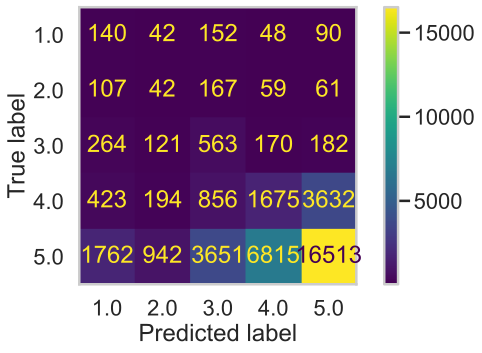

In [359]:
ConfusionMatrixDisplay.from_estimator(pl_rf, X_test, y_test)
plt.grid(False)

In [360]:
pl_rf.score(X_test, y_test)

0.490703628041685

In [361]:
pd.DataFrame(precision_recall_fscore_support(pl_rf.predict(X_test), y_test),
             index=['precision','recall','f1_score','count'],
             columns=[1,2,3,4,5]).T

,precision,recall,f1_score,count
1,0.30,0.05,0.09,2675.0
2,0.10,0.03,0.05,1373.0
3,0.43,0.10,0.17,5378.0
4,0.25,0.19,0.22,8756.0
5,0.56,0.81,0.66,20489.0


## Binary Classifier

In [192]:
X = base_df.drop('is_good', axis=1)
y = base_df['is_good']
X_big_train, X_test, y_big_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_big_train, y_big_train, test_size=0.25, random_state=1, stratify=y_big_train)

In [ ]:
norm_relative = Pipeline([
    ('bi_nsteps',Binarizer(threshold=25)),
    ('norm_minutes_binary_nsteps', FunctionTransformer(lambda x: StdScalerByGroup().fit(x).transform(x))),
])

norm_calories = Pipeline([
    ('bi_nsteps',Binarizer(threshold=300)),
    ('norm_calories_binary_sugar', FunctionTransformer(lambda x: StdScalerByGroup().fit(x).transform(x))),
])

key_ohe = Pipeline([
    ('tfidf',FunctionTransformer(detect_key_low)),
    ('key_ohe', OneHotEncoder(drop='first'))
])

date_ohe = Pipeline([
    ('date_get', FunctionTransformer(lambda x: pd.DataFrame(x['recipe_date'].dt.year))),
    ('date_ohe', OneHotEncoder())
])

preproc_rf = ColumnTransformer(
    transformers=[
        ('tfidf_key_ohe_description', key_ohe, ['is_low','description']),
        ('tfidf_key_ohe_name', key_ohe, ['is_low','name']),
        ('bi_nsteps', Binarizer(threshold=25),['n_steps']),
        ('bi_ningredients', Binarizer(threshold=20),['n_ingredients']),
        ('norm_minutes_binary_nsteps',norm_relative,['n_steps','minutes']),
        ('norm_minutes_binary_ningredients',norm_relative,['n_ingredients','minutes']),
        ('tag_counts',FunctionTransformer(tag_counts),['tags']),
        ('robust_nutrition',RobustScaler(),['sugar','sodium','calories','total_fat']),
        #('norm_calories_binary_sugar',norm_calories,['sugar','calories']),
        ('date_ohe', date_ohe,['recipe_date']),
    ],
    remainder='drop'
)

preproc_lr = ColumnTransformer(
    transformers=[
        ('bi_nsteps', Binarizer(threshold=25),['n_steps']),
        ('bi_ningredients', Binarizer(threshold=20),['n_ingredients']),
        ('norm_minutes_binary_nsteps',norm_relative,['n_steps','minutes']),
        ('norm_minutes_binary_ningredients',norm_relative,['n_ingredients','minutes']),
        ('tag_counts',FunctionTransformer(tag_counts),['tags']),
        ('robust_nutrition',RobustScaler(),['sugar','sodium','calories','total_fat']),
        ('date_ohe', date_ohe,['recipe_date']),
        
        ('tag_pca',FunctionTransformer(tag_ohe_pca),['tags']),
    ],
    remainder='drop'
)

class_weight= 'balanced'
#{5.0: 1.60, 4.0: 6.92, 3.0: 31.78, 2.0: 95.44, 1.0: 90.64}
# balanced weighting automatically calculates th  best weighting!

# take in sparse
pl_rf = Pipeline([
    ('preprocessor', preproc_rf),
    ('rfc', RandomForestClassifier(max_depth=2,
                                   n_estimators=140,
                                   criterion='entropy',
                                   min_samples_split=2,
                                   class_weight=class_weight
                                   ))
])

# take in not sparse
pl_lr = Pipeline([
    ('preprocessor', preproc_lr),
    ('lr',LogisticRegression(max_iter=1000,
                             class_weight=class_weight
                             ))
])

pl_svc = Pipeline([
    ('preprocessor', preproc_lr),
    ('svc', LinearSVC(max_iter=1000,
                      class_weight=class_weight
                      ))
])

voter =VotingClassifier(estimators=[('rfc', pl_rf),
                                     #('lr', pl_lr),
                                     ('svc',pl_svc)
                                     ])

In [ ]:
voter.fit(X_train, y_train)

/Users/kevinb/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



VotingClassifier(estimators=[('rfc',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('tfidf_key_ohe_description',
                                                                                Pipeline(steps=[('tfidf',
                                                                                                 FunctionTransformer(func=<function detect_key_low at 0x1061d6ca0>)),
                                                                                                ('key_ohe',
                                                                                                 OneHotEncoder(drop='first'))]),
                                                                                ['is_low',
                                                                                 'description']),
                                                                               ('tfidf_key_oh

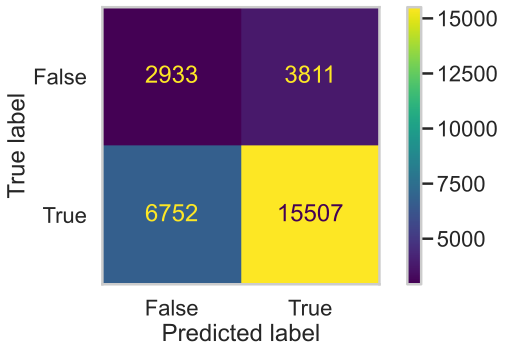

In [ ]:
ConfusionMatrixDisplay.from_estimator(voter, X_val, y_val)
plt.grid(False)

In [ ]:
voter.score(X_val, y_val)

0.6356583801675689

In [ ]:
pd.DataFrame(precision_recall_fscore_support(voter.predict(X_val), y_val),
             index=['precision','recall','f1_score','count'],
             columns=[0,1]).T

,precision,recall,f1_score,count
0,0.43,0.3,0.36,9686.0
1,0.70,0.8,0.75,19317.0


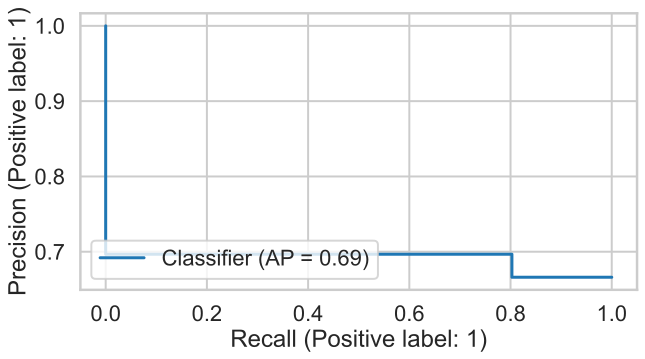

In [ ]:
PrecisionRecallDisplay.from_predictions(voter.predict(X_val), y_val)
plt.show()

## Hyperparameter Tuning

In [ ]:
# dict_list = []
# dict = (y_big_train.shape[0] / y_big_train.value_counts())
# for i in range(10):
#     new = dict + np.random.uniform(-1,1)
#     dict_list.append(new.to_dict())

# %time
# hyperparameters = {
# 'rfc__max_depth': np.arange(2, 20, 2),
# #'rfc__min_samples_split': [2, 5, 10, 20],
# #'rfc__criterion': ['gini', 'entropy'],
# 'rfc__n_estimators': np.arange(100, 150, 10),
# 'rfc__class_weight': dict_list,
# }
# grids = GridSearchCV(pl_rf,
#                      n_jobs=-1,
#                      param_grid=hyperparameters,
#                      return_train_score=False,
#                      cv=5
#                      )

# grids.fit(X_train, y_train)

In [ ]:
# grids.best_params_

{'rfc__class_weight': {5.0: 2.2331314015964794,
  4.0: 6.622815940305035,
  3.0: 30.706605873201624,
  1.0: 82.56960218692927,
  2.0: 90.37478461137327},
 'rfc__max_depth': 2,
 'rfc__n_estimators': 100}

## $K$-fold Test Check With Training data

In [ ]:
# data_test = X_train.assign(rating=y_train)
# data_test["k_fold"] = np.random.choice(list(range(5)),size = len(data_test))

# total_train = []
# total_test = []

# for n in range(20):
#     train_result = []
#     test_result = []

#     for i in range(5):
#         data_test["k_fold"] = np.random.choice(list(range(5)),size = len(data_test))

#         test_data = data_test[data_test["k_fold"]!=i].drop(columns=["k_fold"])

#         train_score = accuracy_score(voter.predict(data_test[data_test["k_fold"]!=i].drop(columns=["rating","k_fold"])),
#                                      data_test[data_test["k_fold"]!=i]["rating"])
        
#         test_score = accuracy_score(voter.predict(data_test[data_test["k_fold"]==i].drop(columns=["rating","k_fold"])),
#                                data_test[data_test["k_fold"]==i]["rating"])
        
#         test_result.append(test_score)
#         train_result.append(train_score)
    
#     total_test.append(sum(test_result)/5)
#     total_train.append(sum(train_result)/5)

# print(f'Training: {sum([i > 0.75 for i in total_train])/20}')   
# px.histogram(total_train).show()
# print(f'Testing: {sum([i > 0.75 for i in total_test])/20}') 
# px.histogram(total_test).show()

# Fairness Assessment

**Analysis**:
Perform a “fairness analysis” of your Final Model from the previous step. That is, try and answer the question **“does my model perform worse for individuals in Group X than it does for individuals in Group Y?”**, for an interesting choice of X and Y.

As always, when comparing some quantitative attribute (in this case, something like precision or RMSE) across two groups, we use a permutation test. Let’s illustrate how this works with an example. Let’s suppose we have a sample voter dataset with columns 'Name', 'Age', and 'Voted', among others. We build a classifier that predicts whether someone voted (1) or didn’t (0).

Here, we’ll say our two groups are
- “young people”, people younger than 40
- “old people”, people older than 40

Note that in this example, we manually created these groups by binarizing the 'Age' column in our dataset, and that’s fine. (Remember, the Binarizer transformer with a threshold of 40 can do this for us.)

For our evaluation metric, we’ll choose precision. (In Week 10’s lectures, we’ll look at other evaluation metrics and related parity measures for classifiers; choose the one that is most appropriate to your prediction task. If you built a regression model, you cannot use classification metrics like precision or recall; instead, you must use RMSE or R2.)

Now, we must perform a permutation test. Before doing so, we must clearly state a null and an alternative hypothesis.

- Null Hypothesis: Our model is fair. Its precision for young people and old people are roughly the same, and any differences are due to random chance.
- Alternative Hypothesis: Our model is unfair. Its precision for young people is lower than its precision for old people.

From here, you should be able to implement the necessary permutation test. The only other guidance we will provide you with is that you should not be modifying your model to produce different results when computing test statistics; use only your final fitted model from Final Model Step.

**Report**:
Clearly state your choice of Group X and Group Y, your evaluation metric, your null and alternative hypotheses, your choice of test statistic and significance level, the resulting p-value, and your conclusion.

Optional: Embed a visualization related to your permutation test in your website.


In [362]:
X_test

,n_ingredients,minutes,n_steps,description,...,name,recipe_date,is_good,is_low
74238,8,25,8,this is a fast dinner. i usually have all of t...,...,easy and quick hamburger and rice dinner,2008-02-02,True,False
8935,10,40,10,posted for zwt6 - na*me region - found on a we...,...,arabic honey cake,2010-05-13,True,False
14156,7,30,13,tastes remarkably like bacon! i tried a recip...,...,bacon with a vegan,2008-08-08,True,False
...,...,...,...,...,...,...,...,...,...
99228,9,185,10,"whenever summertime comes around, i look forwa...",...,grilled marinated shrimp,2009-05-05,True,False
35405,5,40,6,i got this recipe off recipegoldmine and i lov...,...,cake mix banana bread,2008-12-02,True,False
76820,5,25,3,sour cream makes these cupcakes moist and deli...,...,easy moist chocolate cupcakes,2013-12-23,False,True
